# Animal Classification

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load and Prepare Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Unified Mentor Projects/Data files/Animal dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1563 images belonging to 15 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Unified Mentor Projects/Data files/Animal dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 383 images belonging to 15 classes.


# **Basic CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 224

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(15, activation='softmax')  # 15 classes
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  Train the Basic CNN
history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1286s 26s/step - accuracy: 0.1110 - loss: 2.7260 - val_accuracy: 0.1802 - val_loss: 2.5422
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 586ms/step - accuracy: 0.1971 - loss: 2.4539 - val_accuracy: 0.3290 - val_loss: 2.1670
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 615ms/step - accuracy: 0.3466 - loss: 2.0569 - val_accuracy: 0.3394 - val_loss: 2.0630
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 596ms/step - accuracy: 0.4362 - loss: 1.7566 - val_accuracy: 0.3211 - val_loss: 2.1743
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 673ms/step - accuracy: 0.5220 - loss: 1.5738 - val_accuracy: 0.3864 - val_loss: 2.0767
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 596ms/step - accuracy: 0.6009 - loss: 1.3256 - val_accuracy: 0.3786 - val_loss: 2.0491
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 702ms/step - accuracy: 0.6273 - loss: 1.1825 - val_accuracy: 0.4021 - val_loss: 2.0147
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 29s 598ms/step - accuracy: 0.6916 - loss: 1.0017 - val_accu

Pre-trained Models (Transfer Learning) - VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_vgg.trainable = False

model_vgg = Sequential([
    base_vgg,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,782,287 (56.39 MB)

 Trainable params: 67,599 (264.06 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Pre-trained Models (Transfer Learning) - ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_resnet.trainable = False

model_resnet = Sequential([
    base_resnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Pre-trained Models (Transfer Learning) - EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_effnet.trainable = False

model_effnet = Sequential([
    base_effnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

model_effnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Evaluate & Compare
history = model_vgg.fit(train_generator, validation_data=val_generator, epochs=10)

import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.1110 - loss: 2.7340 - val_accuracy: 0.2402 - val_loss: 2.4984
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 684ms/step - accuracy: 0.3249 - loss: 2.3697 - val_accuracy: 0.3473 - val_loss: 2.2669
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 662ms/step - accuracy: 0.4149 - loss: 2.1095 - val_accuracy: 0.4621 - val_loss: 2.0520
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 686ms/step - accuracy: 0.5166 - loss: 1.8645 - val_accuracy: 0.4935 - val_loss: 1.8812
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 657ms/step - accuracy: 0.5619 - loss: 1.6984 - val_accuracy: 0.5144 - val_loss: 1.7420
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 745ms/step - accuracy: 0.6061 - loss: 1.5240 - val_accuracy: 0.5509 - val_loss: 1.6294
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 668ms/step - accuracy: 0.6037 - loss: 1.4729 - val_accuracy: 0.5770 - val_loss: 1.5543
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 683ms/step - accuracy: 0.6135 - loss: 1.3854 - val_accurac

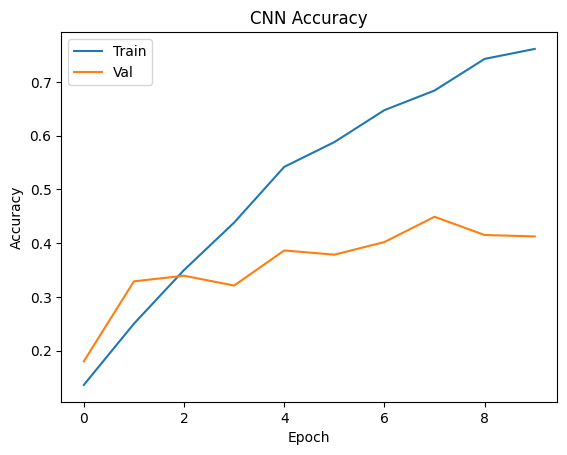

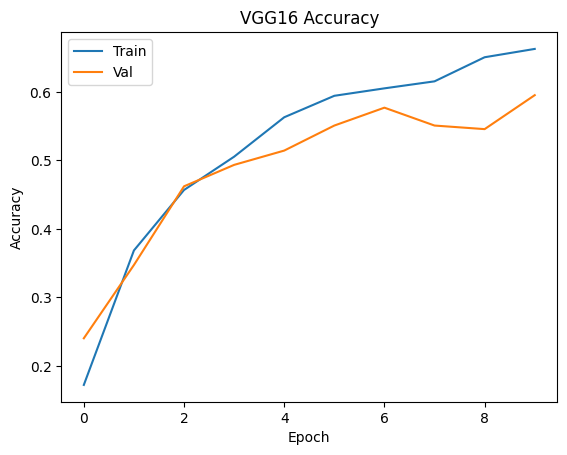

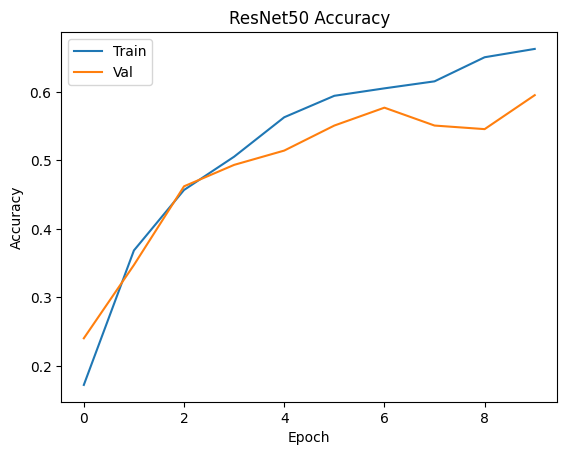

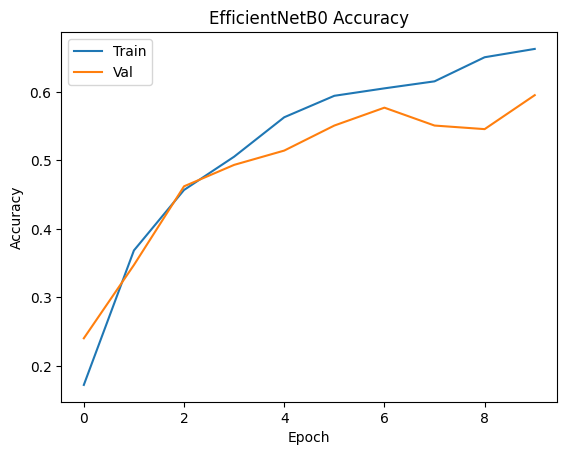

In [ ]:
plot_history(history_cnn, "CNN")
plot_history(history, "VGG16")
plot_history(history, "ResNet50")
plot_history(history, "EfficientNetB0")

**# Animal Classification Using Transfer Learning (MobileNetV2)**

In [ ]:
#Load Pre-trained MobileNetV2 Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [ ]:
# Load the base model
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

In [ ]:
# Freeze the base model
base_model.trainable = False

In [ ]:
# Build the final model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')  # 15 classes
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
#  Train the Model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 469s 9s/step - accuracy: 0.4152 - loss: 2.0035 - val_accuracy: 0.8094 - val_loss: 0.6111
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8341 - loss: 0.5476 - val_accuracy: 0.8329 - val_loss: 0.5094
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8965 - loss: 0.3457 - val_accuracy: 0.8721 - val_loss: 0.4393
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9235 - loss: 0.2364 - val_accuracy: 0.8512 - val_loss: 0.4600
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9238 - loss: 0.2570 - val_accuracy: 0.8668 - val_loss: 0.4678
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9356 - loss: 0.2115 - val_accuracy: 0.8512 - val_loss: 0.4839
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9454 - loss: 0.1774 - val_accuracy: 0.8460 - val_loss: 0.4445
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9593 - loss: 0.1367 - val_accuracy: 0.8512 - v

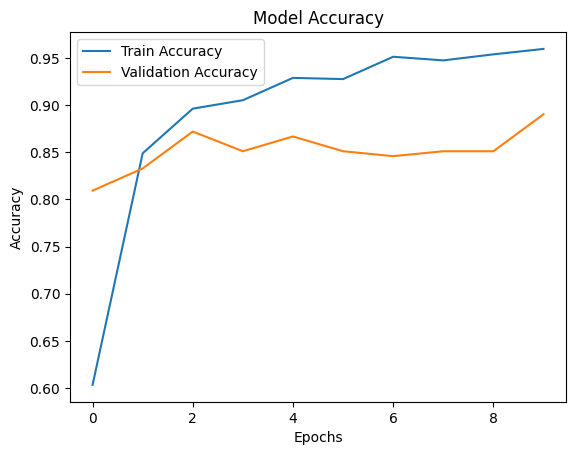

In [ ]:
# Plot Training Results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the Model
model.save('animal_classifier_model.h5')

In [ ]:
# Predict on a New Image

from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess test image
img_path =  r"/content/drive/MyDrive/Unified Mentor Projects/Data files/Animal dataset/Lion/Lion_4_4.jpg"
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]
print("Predicted Animal:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Animal: Lion


In [ ]:
#  Unfreeze and Fine-Tune

In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # smaller LR
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(train_generator, validation_data=val_generator, epochs=5)


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 385s 7s/step - accuracy: 0.9618 - loss: 0.1482 - val_accuracy: 0.9034 - val_loss: 0.2861
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 392s 7s/step - accuracy: 0.9647 - loss: 0.1107 - val_accuracy: 0.9034 - val_loss: 0.3223
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 347s 7s/step - accuracy: 0.9767 - loss: 0.0815 - val_accuracy: 0.9217 - val_loss: 0.2728
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 347s 7s/step - accuracy: 0.9772 - loss: 0.0769 - val_accuracy: 0.9164 - val_loss: 0.2679
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 344s 7s/step - accuracy: 0.9887 - loss: 0.0544 - val_accuracy: 0.9060 - val_loss: 0.2945


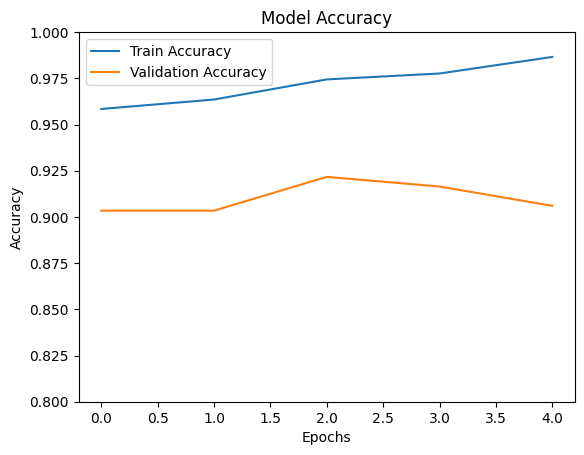

In [ ]:
# Plot Training Results
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.8,1)
plt.legend()
plt.show()

In [ ]:
test_folder_path ="/content/drive/MyDrive/Unified Mentor Projects/Data files/test_images"

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Deer_14_1.jpg --> Predicted: Deer


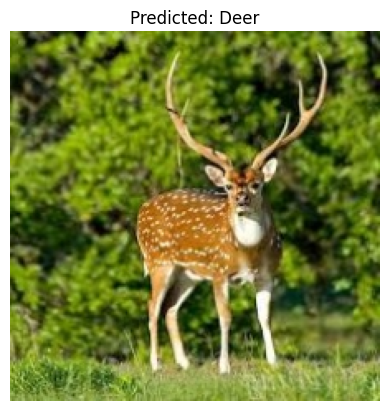

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Bird_9.jpeg --> Predicted: Bird


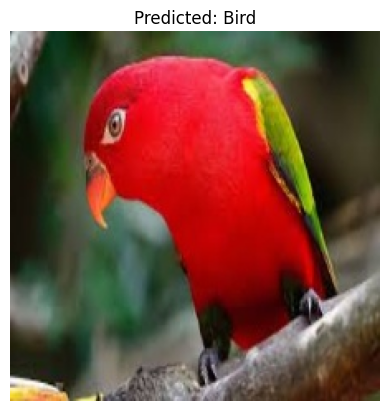

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Cow_6_2.jpg --> Predicted: Cow


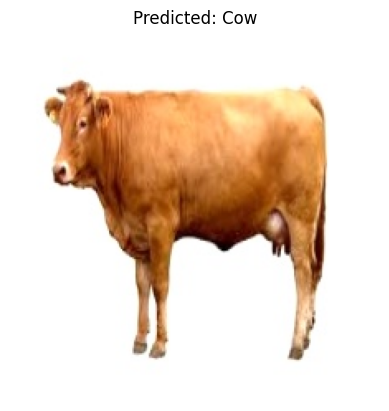

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Cat_9.jpeg --> Predicted: Cat


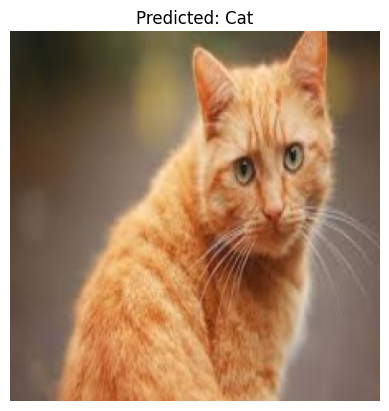

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Cow_7_1.jpg --> Predicted: Cow


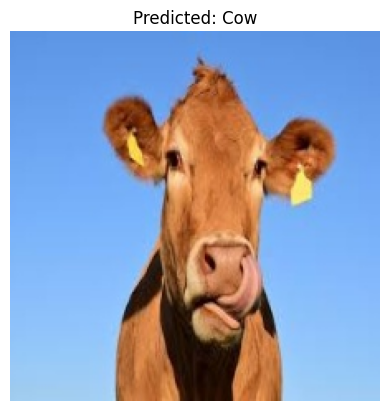

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Cat_4_1.jpg --> Predicted: Cat


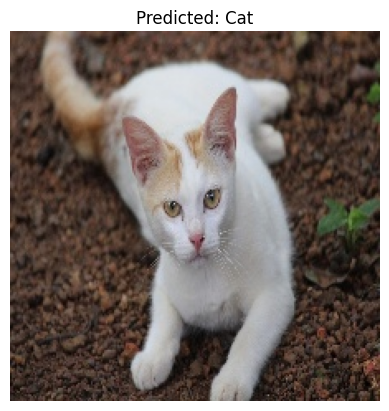

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Bear_9.jpeg --> Predicted: Bear


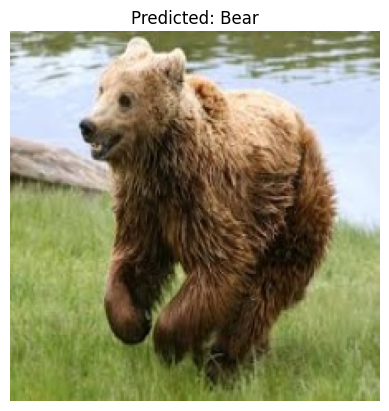

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
bear_4.jpg --> Predicted: Bear


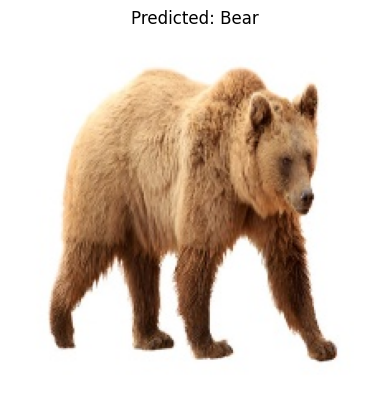

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Bird_1_1.jpg --> Predicted: Bird


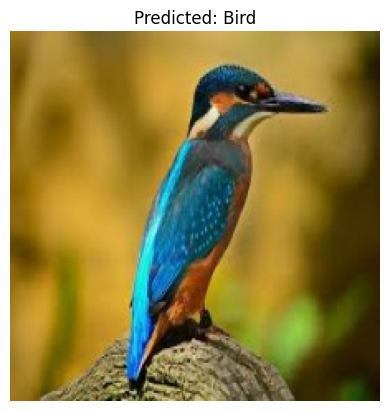

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Kangaroo_1_1.jpg --> Predicted: Kangaroo


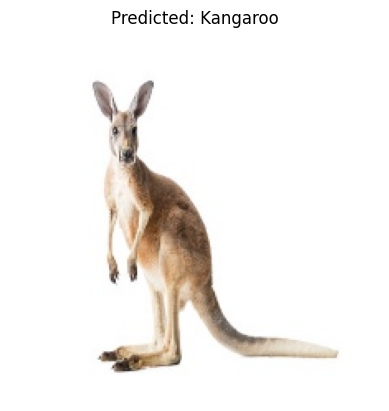

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Tiger_9_1.jpg --> Predicted: Tiger


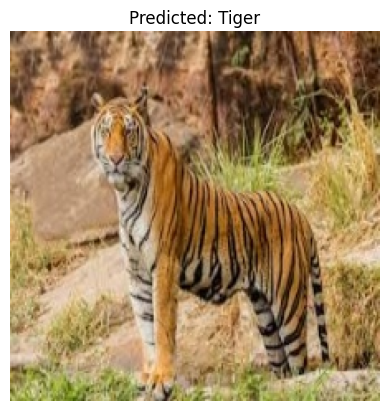

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Zebra_22_1.jpg --> Predicted: Zebra


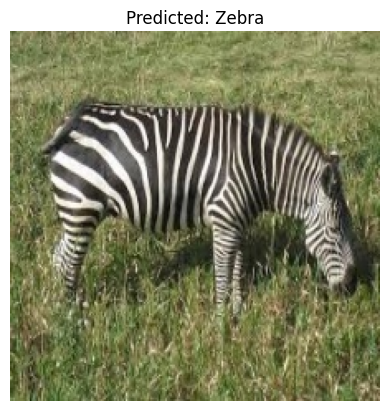

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Tiger_4_1.jpg --> Predicted: Tiger


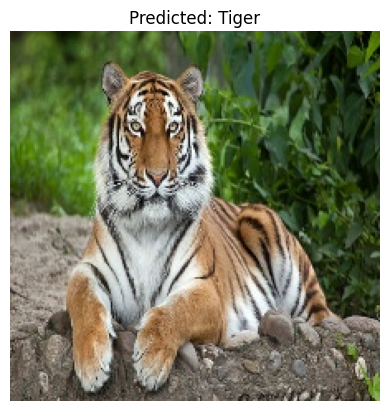

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Panda_6_1.jpg --> Predicted: Panda


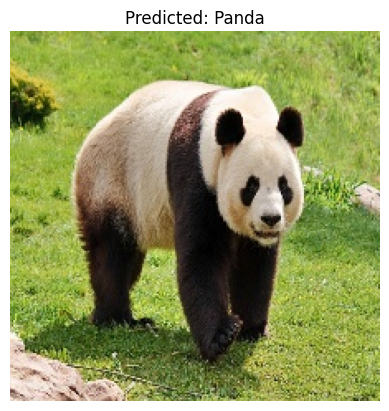

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Zebra_30_1.jpg --> Predicted: Zebra


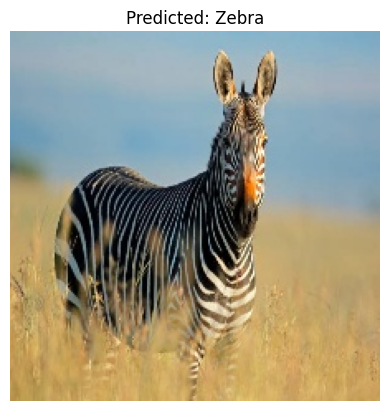

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Panda_10_2.jpg --> Predicted: Panda


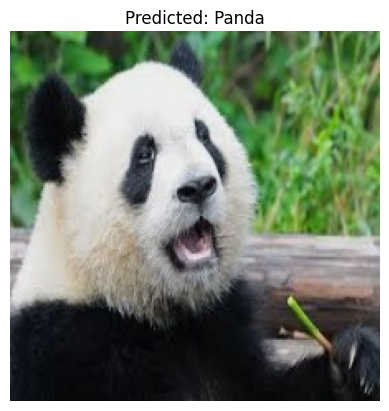

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Kangaroo_2_1.jpg --> Predicted: Kangaroo


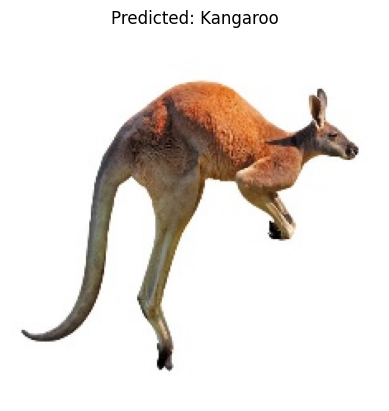

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Lion_11_1.jpg --> Predicted: Lion


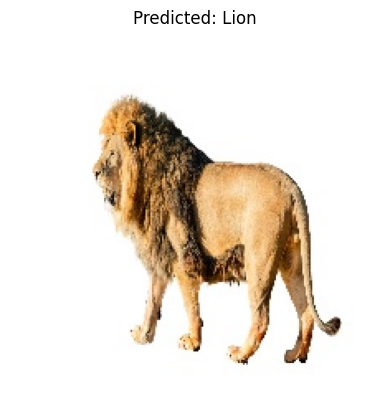

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Horse_9.jpg --> Predicted: Horse


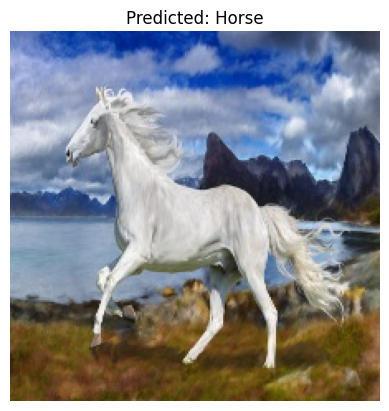

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Lion_18_1.jpg --> Predicted: Lion


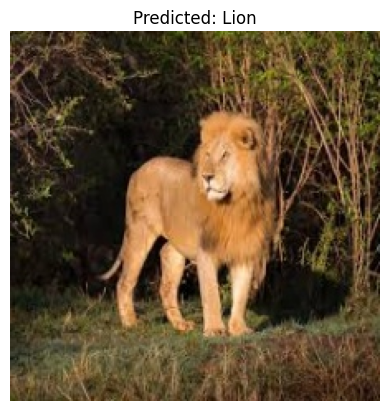

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Giraffe_21.jpeg --> Predicted: Giraffe


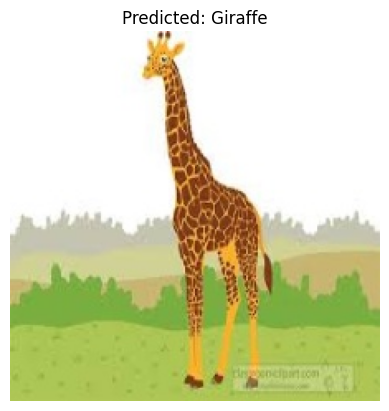

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Dolphin_9_1.jpg --> Predicted: Dolphin


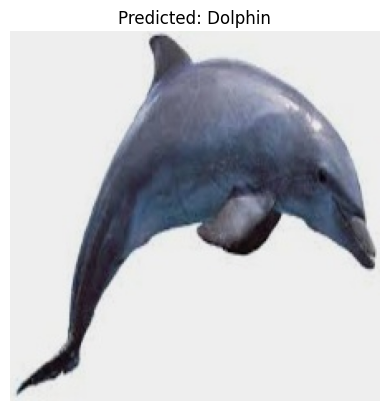

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Giraffe_19_2.jpg --> Predicted: Giraffe


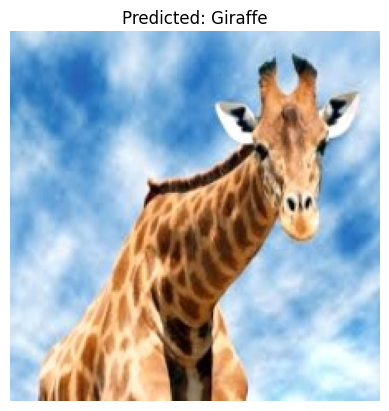

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Horse_5_1.jpg --> Predicted: Horse


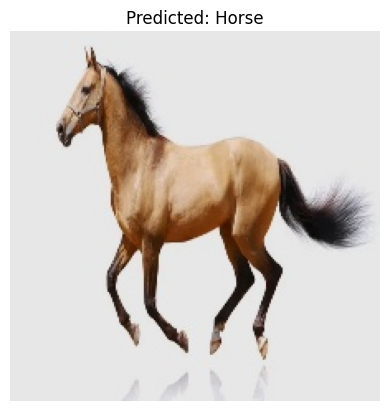

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Elephant_18_1.jpg --> Predicted: Elephant


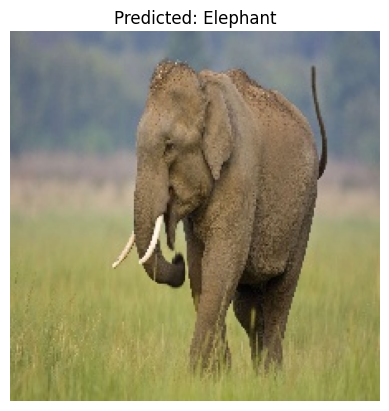

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Elephant_17_1.jpg --> Predicted: Elephant


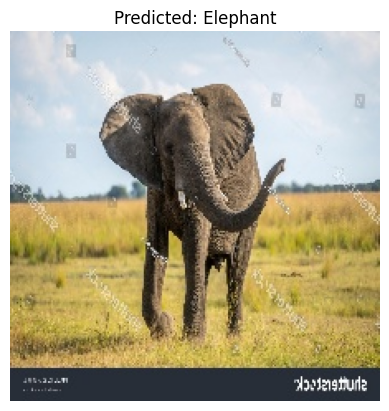

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Dog_4.jpeg --> Predicted: Dog


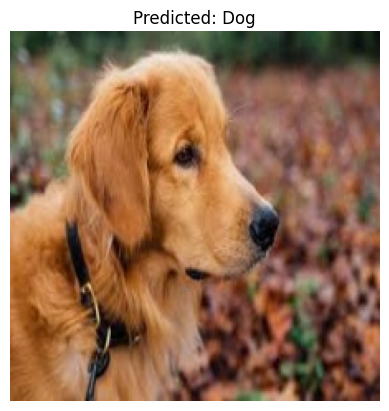

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Dog_7.jpg --> Predicted: Dog


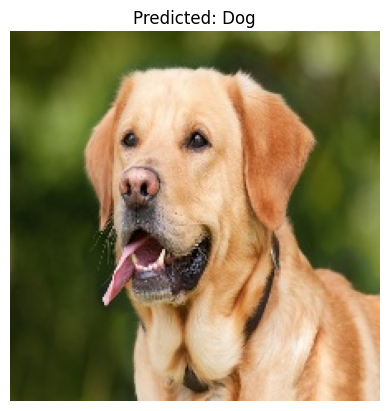

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Dolphin_3.jpeg --> Predicted: Dolphin


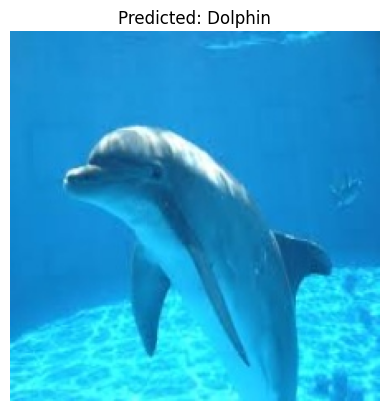

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Deer_28_1.jpg --> Predicted: Deer


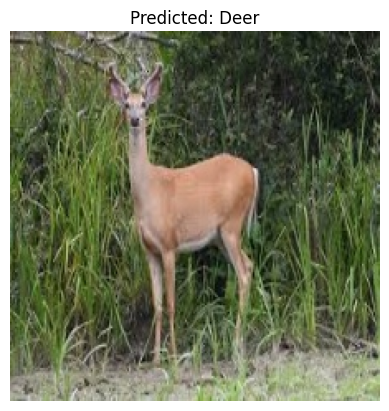

In [ ]:
# Define Prediction loop

IMG_SIZE = 224

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Loop through images in the folder
for filename in os.listdir(test_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(test_folder_path, filename)

        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]

        # Show result
        print(f"{filename} --> Predicted: {predicted_class}")

        # Optional: Show image with prediction
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis('off')
        plt.show()


In [ ]:
# Store Predictions in a CSV
import pandas as pd

results = []

for filename in os.listdir(test_folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(test_folder_path, filename)
        img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]
        results.append({'filename': filename, 'predicted': predicted_class})

# Save to CSV
df = pd.DataFrame(results)
df.to_csv("folder_predictions.csv", index=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━